# Atividade: Petroleo

**INSTITUTO FEDERAL DE MINAS GERAIS BAMBUI**

**Pofessor:** Ciniro Nametala

**Aluno:** Ricardo Antonio

In [1206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygwalker as pyg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

<h2>Treinamento<h2>

In [1207]:
def degrau_bipolar(u):
   if u >= 0:
      y=1
   else:
      y=-1
   return y

In [1208]:
#Passo 1

dados = pd.read_csv('petroleo_treino.csv', sep=';')
print(dados.shape)
n_variaveis = dados.shape[1]-2
print(n_variaveis)
n_amostras = dados.shape[0]
print(n_amostras)
# print(dados.head())
x = dados.iloc[:, 1:n_variaveis+1].values
# print(x)
dados['x1'] = pd.to_numeric(dados['x1'], errors='coerce')
dados['x2'] = pd.to_numeric(dados['x2'], errors='coerce')
dados['x3'] = pd.to_numeric(dados['x3'], errors='coerce')
dados['y'] = pd.to_numeric(dados['d'], errors='coerce')

(30, 5)
3
30


In [1209]:
# -------------------------------
# 3. Plotly (interativo)
# -------------------------------
fig = go.Figure(data=[go.Scatter3d(
    x=dados['x1'], y=dados['x2'], z=dados['x3'],
    mode='markers',
    marker=dict(
        size=6,
        color=dados['y'],      # cor baseada em y
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(scene=dict(
    xaxis_title='x1',
    yaxis_title='x2',
    zaxis_title='x3'),
    title="Gráfico 3D - Plotly"
)
fig.show()

#Olhando o grafico acho que não é possivel classificar com apenas uma linha, 
#Pois a maioria das amarelas ficam no meio das roxas

In [1210]:
bias = np.ones((n_amostras,1)) * -1
x = np.hstack((x,bias))
# print(x)

In [1211]:
#Passo 2
y = dados.iloc[:, 5].values
# print(y)

print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == 1).sum()}")

-1: 16
1: 14


In [ ]:
#Passo 3
quantRoda = 5
pesosAntes = []
pesosDepois = []
for i in range(quantRoda):
   
   w = np.random.uniform(-1, 1, n_variaveis+1)
   pesosAntes.append(w.copy())

   #Passo 4
   #taxa de aprendizagem eta
   eta = 0.01

   #Passo 5
   #n_amostras

   #Passo 6
   tolerancia = 0.01

   #Passo 7
   erro_medio = tolerancia + 1

   #Passo 8
   erro_epocas = []

   #Passo 9
   epoca = 0

   #Passo 10
   max_epocas = 1000

   #Passo 11
   criterio_erro = True
   criterio_epoca = True

   #Passo 12 13 14 15 16 17 18 19 20 21 22 23 24
   while(criterio_epoca and criterio_erro):
      erro_atual = 0
      epoca = epoca + 1
      
      indices_embaralhados = np.random.permutation(n_amostras)
      for i in range(n_amostras):
         indice_amostra = indices_embaralhados[i]
         xi_amostra = x[indice_amostra, :]
         u = np.dot(w.T, xi_amostra)
         yhat = degrau_bipolar(u)
         e = y[indice_amostra] - yhat
         w = w + ((eta * e) * xi_amostra)
         erro_atual = erro_atual + np.abs(e)
         
      erro_medio = erro_atual/n_amostras
      erro_epocas.append(erro_medio)
      
      if erro_medio <= tolerancia:
         criterio_erro = False
      if epoca >= max_epocas:
         criterio_epoca = False
   pesosDepois.append(w.copy())

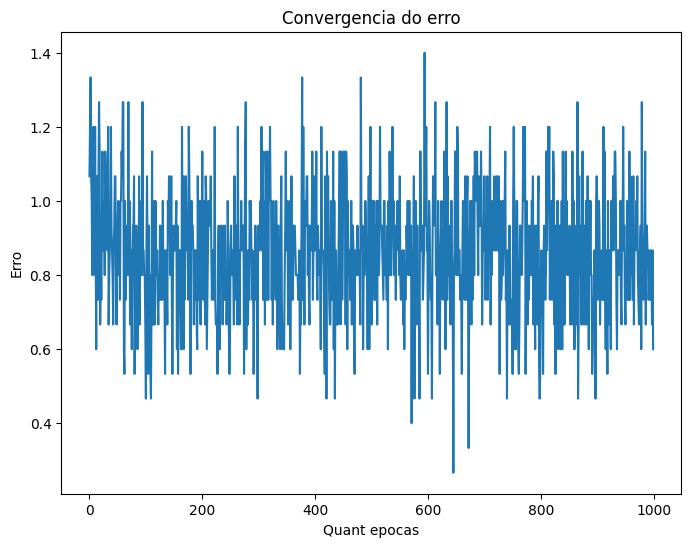

In [1213]:
# -------------------------------
# CONVERGENCIA DE ERROS
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(erro_epocas[:max_epocas])
plt.title("Convergencia do erro")
plt.xlabel("Quant epocas")
plt.ylabel("Erro")
plt.grid
plt.show()


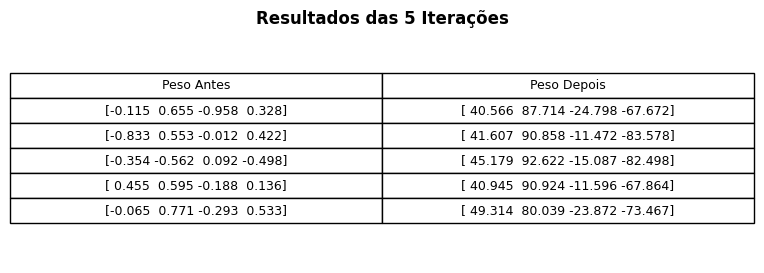

In [1214]:
col_labels = ["Peso Antes", "Peso Depois"]
table_data = [
    [np.round(pesosAntes[i], 3), np.round(pesosDepois[i], 3)]
    for i in range(quantRoda)
]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis("off")
table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc="center",
    cellLoc="center",
)
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.title("Resultados das 5 Iterações", fontsize=12, weight="bold")
plt.show()

<h1>Previsão com dados Treino</h1>

In [1215]:
def previsao(w, x):
   u = np.dot(w.T, x)
   yhat = degrau_bipolar(u)
   return yhat

In [1216]:
# Cria um vetor para receber todas as previsoes realizadas pela RNA

yhat = np.zeros(n_amostras)
listayHat = []
#Armazenar todas as previsoes uma para cada amostra
for j in range(quantRoda):
   for i in range(n_amostras):
      # print("Previsao", j ,"com os pesos - ", pesosDepois[j])
      yhat[i] = previsao(pesosDepois[j], x[i,:])
      # print("Que deu,", yhat[i])
   listayHat.append(yhat)
   yhat = np.zeros(n_amostras)
   
listayHat = np.array(listayHat)
# print(listayHat)

<h4>ANÁLISE DA QUALIDADE DE CLASSIFICAÇÃO</h4>

MATRIZ DE CONFUSÂO PESOS[ 0 ]


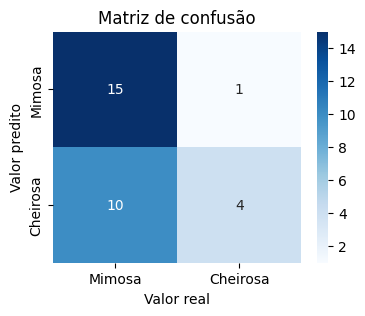

MATRIZ DE CONFUSÂO PESOS[ 1 ]


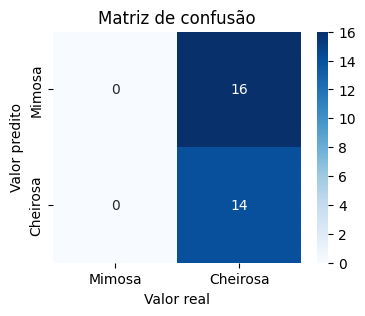

MATRIZ DE CONFUSÂO PESOS[ 2 ]


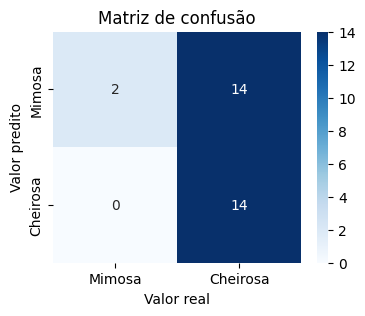

MATRIZ DE CONFUSÂO PESOS[ 3 ]


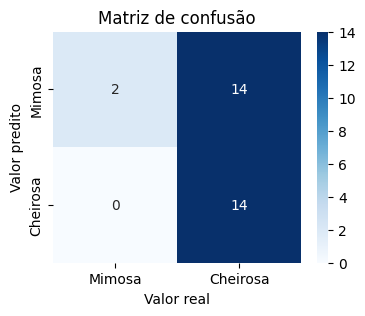

MATRIZ DE CONFUSÂO PESOS[ 4 ]


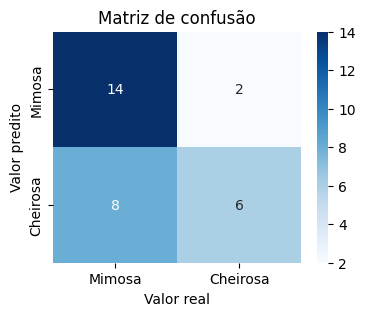

In [1217]:
#converter -1 em 0
yhat_display = np.where(listayHat == -1,0,listayHat)
y_display = np.where(y == -1,0,y)
# print(yhat_display)
#gera a matriz de confusao


#TAVA MUITO POLUIDO SE QUISER VER DEIXA TRUE
queroVerConfusao = True
if queroVerConfusao:
   for i in range(quantRoda):
      cm = confusion_matrix(y_display, yhat_display[i])
      print('MATRIZ DE CONFUSÂO PESOS[', i,']')
      # print(cm)

      #plotar matriz de confusão crocante
      plt.figure(figsize=(4,3))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=['Mimosa', 'Cheirosa'], yticklabels=['Mimosa', 'Cheirosa'])

      plt.title('Matriz de confusão')
      plt.xlabel('Valor real')
      plt.ylabel('Valor predito')
      plt.show()

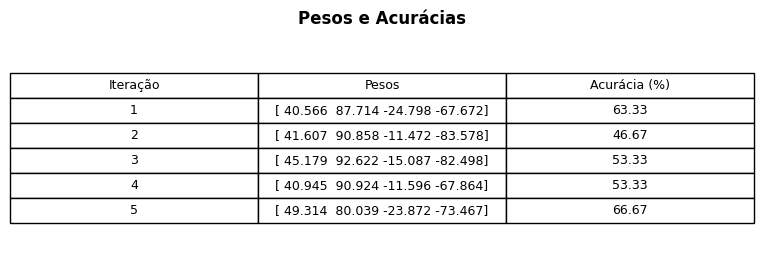

In [1218]:
acuracias = []

for i in range(quantRoda):
    acuracia = np.sum(listayHat[i] == y) / n_amostras
    acuracias.append(acuracia * 100)
   #  print(f"ACURÁCIA PESOS[{i}] = {acuracia*100:.2f}%")

# --- Criação da tabela com Matplotlib ---
col_labels = ["Iteração", "Pesos", "Acurácia (%)"]
table_data = [
    [i+1, np.round(pesosDepois[i], 3), round(acuracias[i], 2)] for i in range(quantRoda)
]

fig, ax = plt.subplots(figsize=(8, 3))
ax.axis("off")

table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc="center",
    cellLoc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

plt.title("Pesos e Acurácias", fontsize=12, weight="bold")
plt.show()

<h1>Previsão com dados de teste<h1>

In [1219]:
dados = pd.read_csv('petroleo_teste.csv', sep=';')
n_variaveis = dados.shape[1]-1
# print(n_variaveis)
n_amostras = dados.shape[0]
# print(n_amostras)
x = dados.iloc[:, 0:n_variaveis].values

bias = np.ones((n_amostras,1)) * -1
x = np.hstack((x,bias))
print(x)

[[-0.3665  0.062   5.9891 -1.    ]
 [-0.7842  1.1267  5.5912 -1.    ]
 [ 0.3012  0.5611  5.8234 -1.    ]
 [ 0.7757  1.0648  8.0677 -1.    ]
 [ 0.157   0.8028  6.304  -1.    ]
 [-0.7014  1.0316  3.6005 -1.    ]
 [ 0.3748  0.1536  6.1537 -1.    ]
 [-0.692   0.9404  4.4058 -1.    ]
 [-1.397   0.7141  4.9263 -1.    ]
 [-1.8842  0.2805  1.2548 -1.    ]]


In [1220]:
listayHat = []
yhat = np.zeros(n_amostras)
#Armazenar todas as previsoes uma para cada amostra
for j in range(quantRoda):
   for i in range(n_amostras):
      # print("Previsao", j ,"com os pesos - ", pesosDepois[j])
      yhat[i] = previsao(pesosDepois[j], x[i,:])
      # print("Que deu,", yhat[i])
   listayHat.append(yhat)
   yhat = np.zeros(n_amostras)
listayHat = np.array(listayHat)
# print(listayHat)

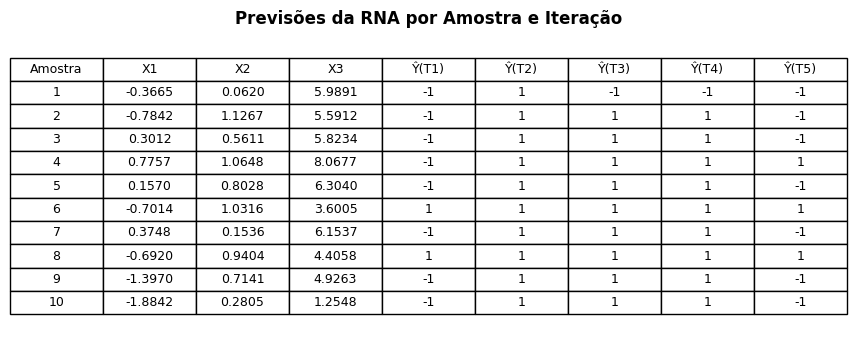

In [1221]:
Xdados = x[:, :n_variaveis]

# Cria rótulos das colunas
col_labels = ["Amostra", "X1", "X2", "X3"] + [f"Ŷ(T{i+1})" for i in range(listayHat.shape[0])]

# Monta os dados da tabela
table_data = []
for i in range(x.shape[0]):
    linha = [
        i + 1,
        f"{Xdados[i,0]:.4f}",
        f"{Xdados[i,1]:.4f}",
        f"{Xdados[i,2]:.4f}",
    ]
    linha += [int(listayHat[j, i]) for j in range(listayHat.shape[0])]
    table_data.append(linha)

# Cria a tabela com Matplotlib
fig, ax = plt.subplots(figsize=(9, 4))
ax.axis('off')

table = ax.table(
    cellText=table_data,
    colLabels=col_labels,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.4)

plt.title("Previsões da RNA por Amostra e Iteração", fontsize=12, weight='bold')
plt.show()

<style>
  p {
    font-size: 16px;
    margin-bottom: 8px;
  }
  .resposta {
    color: green;
    font-weight: 500;
    font-size: 20px;
    display: block;
    margin-bottom: 15px;
  }

</style>
<h2>Perguntas<h2>

<p>5) Qual o efeito de aumentar ou diminuir o número de épocas na qualidade dos resultados?</p>
<span class="resposta">R: Não, a partir da época 200 a 400, ele já atingiu o erro mínimo possível e fica perdido.</span>

<p>6) Qual o efeito de aumentar ou diminuir a taxa de aprendizagem na qualidade dos resultados?</p>
<span class="resposta">R: Testei com a taxa de aprendizagem entre 0.01 e 1. Senti que a diferença da acurácia e as iterações aumentava conforme ela aumentava também. Porém independente da taxa de aprendizagem a média entre as acurácias sempre pendia a 60%.</span>

<p>7) Discorra se é possível afirmar se as suas classes, neste problema, são linearmente separáveis.</p>
<span class="resposta">R: Ao bater o olho no gráfico já percebi que não eram, pois não importava o quanto eu girasse, nunca conseguia achar uma linha que separava as bolinhas roxas das amarelas.</span>
